In [7]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud # https://pypi.org/project/wordcloud/
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ericmartinez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('data/merged_data.csv')

In [3]:
df_only_text = df[['comment_text','toxic']]

In [4]:
df_only_text

,comment_text,toxic
0,haha you guys are a bunch of losers.,1
1,This is a great story. Man. I wonder if the pe...,0
2,"Angry trolls, misogynists and Racists"", oh my....",1
3,Nice to some attempts to try to make comments ...,0
4,Yet call out all Muslims for the acts of a few...,1
...,...,...
426700,I agree whole-heartedly with your Rick Lewis c...,0
426701,Women not shopping for a day to protest what??...,0
426702,1. You know no more than I do. It's a logical ...,0
426703,As the man said... you can teach a person how ...,0


In [5]:
toxic_comments = df_only_text[df_only_text['toxic'] == 1]['comment_text']
nontoxic_comments = df_only_text[df_only_text['toxic'] == 0]['comment_text']


In [6]:
toxic_comments

0                      haha you guys are a bunch of losers.
2         Angry trolls, misogynists and Racists", oh my....
4         Yet call out all Muslims for the acts of a few...
5         This bitch is nuts. Who would read a book by a...
26        “Will Whiteness History Month make all white p...
                                ...                        
426609    Now, here is a guy who seems to be a soul mate...
426631    klastri>  Everything with you is psycho this, ...
426634    Never underestimate the idiocy of the Hawaii D...
426655    If OJ were white, he'd be on death row, where ...
426685    Yes but we are talking about a man who praised...
Name: comment_text, Length: 48434, dtype: object

In [7]:
nontoxic_comments

1         This is a great story. Man. I wonder if the pe...
3         Nice to some attempts to try to make comments ...
6                                                  Awesome!
7         YET ANOTHER BARACK OBAMA LIBERAL MEDIA CONSPIR...
8         Because the people who drive cars more are the...
                                ...                        
426700    I agree whole-heartedly with your Rick Lewis c...
426701    Women not shopping for a day to protest what??...
426702    1. You know no more than I do. It's a logical ...
426703    As the man said... you can teach a person how ...
426704    Let's look at it another way: as society begin...
Name: comment_text, Length: 378271, dtype: object

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate("".join(toxic_comments))

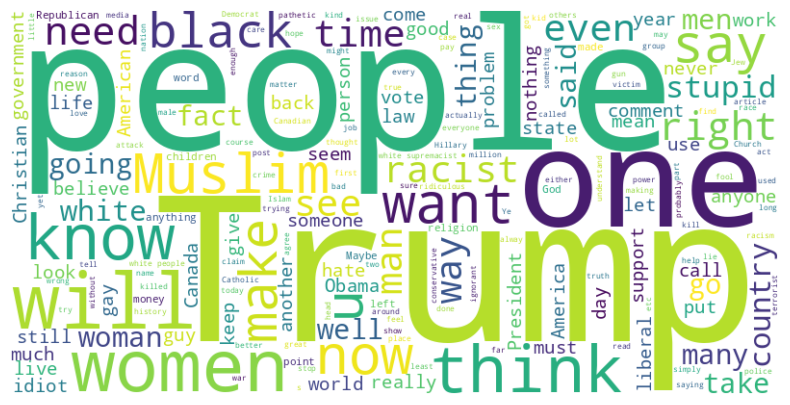

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate("".join(nontoxic_comments))

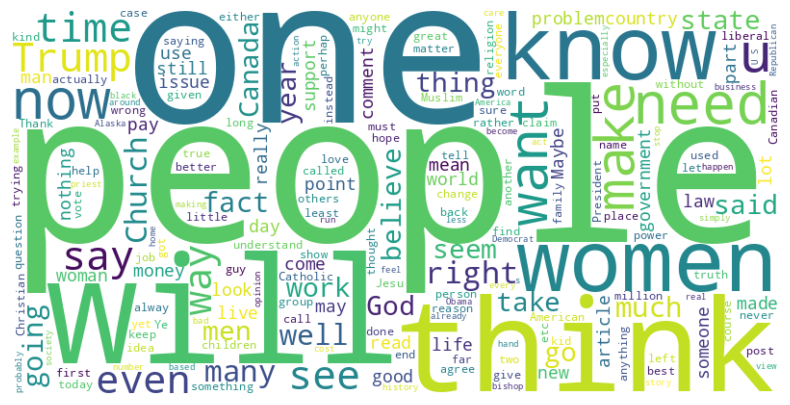

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
# Tokenize the comments
toxic_tokens = toxic_comments.apply(word_tokenize)
nontoxic_tokens = nontoxic_comments.apply(word_tokenize)

NameError: name 'toxic_comments' is not defined

In [24]:
toxic_tokens[0]

['haha', 'you', 'guys', 'are', 'a', 'bunch', 'of', 'losers', '.']

## Stopwords Removal

This will remove all the common words like: this, is, and, the, etc

In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(len(stop_words))                         
# stop_words contains a list of 179 words that we want to remove from our comments

179


In [5]:
#removing stop_words from the token_list

flat_token_list = []
for sublist in toxic_tokens:
    for token in sublist:
        if token not in stop_words:
            flat_token_list.append(token)


NameError: name 'toxic_tokens' is not defined

In [26]:
flat_token_list

['haha',
 'you',
 'guys',
 'are',
 'a',
 'bunch',
 'of',
 'losers',
 '.',
 'Angry',
 'trolls',
 ',',
 'misogynists',
 'and',
 'Racists',
 "''",
 ',',
 'oh',
 'my',
 '.',
 'It',
 'does',
 "n't",
 'take',
 'all',
 'of',
 'my',
 '150',
 'IQ',
 'to',
 'see',
 'the',
 'slant',
 'here',
 '.',
 'it',
 "'s",
 'the',
 '``',
 'Diversity',
 'diode',
 "''",
 'at',
 'work',
 'yet',
 'again',
 '.',
 '``',
 'We',
 'can',
 'say',
 'anything',
 'that',
 'we',
 'want',
 'because',
 'we',
 'are',
 'Diversity',
 '.',
 'You',
 'on',
 'the',
 'other',
 'hand',
 'must',
 'only',
 'say',
 'what',
 'we',
 'allow',
 'you',
 'to',
 'say',
 '.',
 'From',
 'now',
 'on',
 ',',
 'winning',
 'arguments',
 'against',
 'any',
 'member',
 'of',
 'diversity',
 'will',
 'be',
 'considered',
 'offensive',
 'language',
 '.',
 'facts',
 ',',
 'cogent',
 ',',
 'linear',
 'posts',
 'and',
 'Math',
 'are',
 'now',
 'verboten',
 '.',
 'Yet',
 'call',
 'out',
 'all',
 'Muslims',
 'for',
 'the',
 'acts',
 'of',
 'a',
 'few',
 'wil

In [46]:
# now generate the n_grams=2
n_grams = ngrams(flat_token_list,2)
# Convert n-grams to a DataFrame with two columns
df_ngrams = pd.DataFrame(n_grams, columns=['first_word', 'second_word'])
# Combine the two columns into a single column for counting
df_ngrams['combined_ngram'] = df_ngrams['first_word'] + ' ' + df_ngrams['second_word']
# Count the occurrences of each combined n-gram
ngram_counts = df_ngrams['combined_ngram'].value_counts()
# Get the top 10 most frequent n-grams
top_10_ngrams = ngram_counts.head(10)
# Display the top 10 n-grams
print(top_10_ngrams)

combined_ngram
of the    10524
. I        9948
, and      9065
. The      8646
in the     8628
is a       6403
do n't     5895
to be      5379
. It       5195
. You      4992
Name: count, dtype: int64


In [47]:
# this is not helpful... I will have to apply first Lemmanization / Steamming /Stop words
# and check it again

In [49]:
# actually and easier way to to quantify the words is using CountVectorizer

X_train = toxic_comments

vect = CountVectorizer().fit(X_train)
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print("X_train_vectorized: ", X_train_vectorized)

X_train_vectorized:    (0, 3528)	1
  (0, 7202)	1
  (0, 20821)	1
  (0, 20932)	1
  (0, 27888)	1
  (0, 32638)	1
  (0, 51882)	1
  (1, 173)	1
  (1, 2126)	1
  (1, 2128)	1
  (1, 2538)	1
  (1, 2594)	1
  (1, 2945)	2
  (1, 3021)	1
  (1, 3218)	1
  (1, 3229)	1
  (1, 3528)	2
  (1, 3559)	1
  (1, 4001)	1
  (1, 5048)	1
  (1, 5124)	1
  (1, 7644)	1
  (1, 9577)	1
  (1, 10477)	1
  (1, 13506)	1
  :	:
  (48433, 1425)	1
  (48433, 3528)	1
  (48433, 6991)	1
  (48433, 7348)	1
  (48433, 11353)	1
  (48433, 13315)	1
  (48433, 17229)	1
  (48433, 18420)	1
  (48433, 18791)	1
  (48433, 22075)	1
  (48433, 23491)	1
  (48433, 24421)	1
  (48433, 24780)	1
  (48433, 27610)	1
  (48433, 28490)	1
  (48433, 32853)	1
  (48433, 36078)	1
  (48433, 44041)	1
  (48433, 44394)	1
  (48433, 45749)	1
  (48433, 46327)	3
  (48433, 46506)	1
  (48433, 50466)	2
  (48433, 50881)	1
  (48433, 51815)	1


In [50]:
print("X_train shape = {}".format(X_train.shape))
print("Vocabulary length = {}".format(len(vect.vocabulary_)))

X_train shape = (48434,)
Vocabulary length = 52180


In [55]:
# Convert the document-term matrix to a DataFrame
df = pd.DataFrame(X_train_vectorized.toarray(), columns=vect.get_feature_names_out())

# Sum the counts for each word/n-gram
word_counts = df.sum(axis=0)

# Sort and get the top N words/n-grams
top_words = word_counts.sort_values(ascending=False).head(10)
print(top_words)

the     123559
and      72871
to       72364
of       59218
is       48901
that     39570
you      39245
in       37009
it       29382
are      27977
dtype: int64
